# Motion illusions as optimal percepts

In [6]:
%matplotlib inline
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
from ipywidgets import interact

In [14]:
def imshow(ax, p):
    ax.imshow(p.T, origin='lower', interpolation='nearest', cmap='gray')
    xmid = (p.shape[1] - 1) / 2
    ymid = (p.shape[0] - 1) / 2
    ax.vlines(ymid, 0, p.shape[1], color='gray')
    ax.hlines(xmid, 0, p.shape[0], color='gray')

In [15]:
def uniform(x, low, high):
    return scipy.stats.uniform.logpdf(x, low, high - low)

In [16]:
def norm(x, mu, sigma):
    return scipy.stats.norm.logpdf(x, mu, sigma)

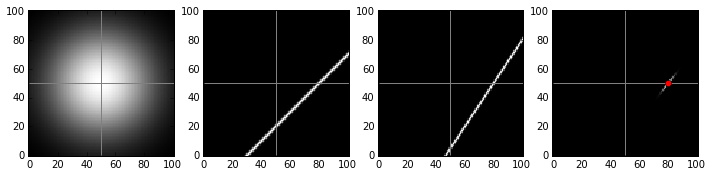

In [22]:
vx, vy = np.ogrid[-50:51,-50:51]
priors = []

# zero-mean gaussian prior
priors.append(norm(vx, 0, 25) + norm(vy, 0, 25))

# velocity average (VA) gaussian prior
priors.append(norm(vx, 17.88461538, 5) + norm(vy, -14.42307692, 5))

# uniform prior
priors.append(uniform(vx, -50, 100) + uniform(vy, -50, 100))


@interact
def plot(prior=(0, 2), sigma=(1,10)):
    lh1 = uniform(vx, -50, 100) + norm(vy - vx + 30, 0, sigma)
    lh2 = uniform(vx, -50, 100) + norm(vy - 1.5 * vx + 45, 0, sigma)
    posterior = lh1 + lh2 + priors[prior]
    MAP = np.unravel_index(np.argmax(posterior), posterior.shape)

    fig, axes = plt.subplots(1, 4)
    imshow(axes[0], np.exp(priors[prior]))
    imshow(axes[1], np.exp(lh1))
    imshow(axes[2], np.exp(lh2))
    imshow(axes[3], np.exp(posterior))

    axes[3].autoscale(enable=False)
    axes[3].plot(MAP[0], MAP[1], 'ro')

    fig.set_size_inches(12, 3)